In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('IBM.csv')


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [5]:

# Step 2: Select the appropriate feature for creating the model from the training data
data = df['Close'].values.reshape(-1, 1)

# Step 3: Normalize the features and convert it into timestamps of 60
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [6]:

def create_dataset(data, timestamp):
    X, y = [], []
    for i in range(len(data) - timestamp):
        X.append(data[i:(i + timestamp), 0])
        y.append(data[i + timestamp, 0])
    return np.array(X), np.array(y)

# Step 4: Reshape the data for applying to the LSTM model
timestamp = 60
X, y = create_dataset(data, timestamp)

# Reshape data into (samples, timestamp, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 5: Create a sequential LSTM model using Keras
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Step 6: Compile the model and train it using the training data
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)




Epoch 1/10

93/93 [==============================] - 6s 25ms/step - loss: 0.0151
Epoch 2/10
93/93 [==============================] - 2s 26ms/step - loss: 9.3733e-04
Epoch 3/10
93/93 [==============================] - 2s 26ms/step - loss: 8.7233e-04
Epoch 4/10
93/93 [==============================] - 2s 26ms/step - loss: 8.5198e-04
Epoch 5/10
93/93 [==============================] - 2s 27ms/step - loss: 7.9438e-04
Epoch 6/10
93/93 [==============================] - 2s 26ms/step - loss: 7.1992e-04
Epoch 7/10
93/93 [==============================] - 2s 27ms/step - loss: 7.0491e-04
Epoch 8/10
93/93 [==============================] - 2s 26ms/step - loss: 6.8349e-04
Epoch 9/10
93/93 [==============================] - 2s 26ms/step - loss: 6.2521e-04
Epoch 10/10
93/93 [==============================] - 2s 26ms/step - loss: 6.1613e-04


In [7]:

# Step 7: Predict using the test data
test_data = df['Close'].values.reshape(-1, 1)
scaled_test_data = scaler.transform(test_data)
X_test, y_test = create_dataset(scaled_test_data, timestamp)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


93/93 [==============================] - 2s 10ms/step


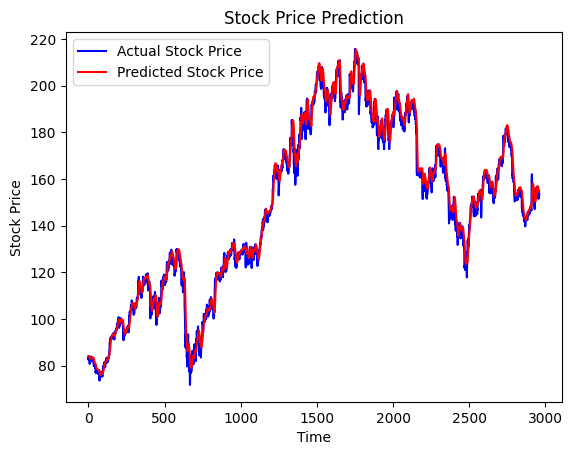

In [8]:

# Plotting the results
plt.plot(test_data[timestamp:], color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


1/1 [==============================] - 0s 23ms/step


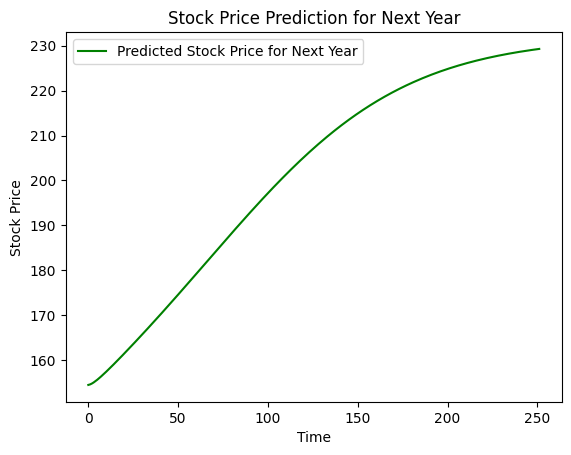

In [9]:
# Step 7: Predict for the next year
future_timestamps = 252  # Assuming 252 trading days in a year
future_data = data[-timestamp:]  # Taking the last 'timestamp' data points
predicted_prices = []

for i in range(future_timestamps):
    X_future = np.reshape(future_data, (1, timestamp, 1))
    predicted_price = model.predict(X_future)
    predicted_prices.append(predicted_price)
    future_data = np.append(future_data[1:], predicted_price)  # Shift the data window by 1

# Inverse transform the predicted prices to get the actual stock prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Plotting the results
plt.plot(predicted_prices, color='green', label='Predicted Stock Price for Next Year')
plt.title('Stock Price Prediction for Next Year')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()